In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [5]:
Airlines=pd.read_excel('Airlines+Data.xlsx',index_col ='Month',parse_dates = True) 

In [6]:
 Airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


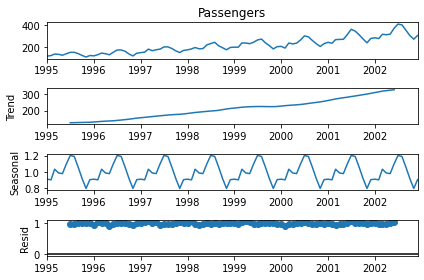

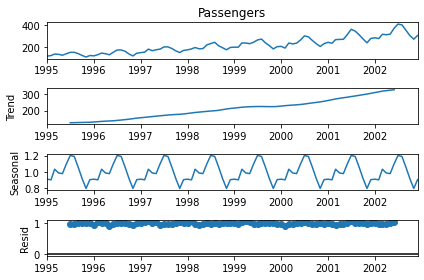

In [7]:
result=seasonal_decompose(Airlines['Passengers'],model='multiplicative')
result.plot()

In [8]:
# fit auto_arima function to Airpassengers datast

stepwise_fit=auto_arima(Airlines['Passengers'],start_p=1,start_q=1,
                       max_p=3,max_q=3,m=12,
                       start_P=0,seasonal=True,
                       d=None,D=1,trace=True,
                        error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)
                        

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.63 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.25 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.53 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.29 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=1.15 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [9]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Sat, 29 Oct 2022   AIC                            615.965
Time:                                    06:10:51   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# split the data into test/train set
train=Airlines.iloc[:len(Airlines)-12]
test=Airlines.iloc[len(Airlines)-12:] # set one year(12 months) for testing

In [11]:
#Fit a SARIMAX(1,1,0)x(1,1,0,12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],order = (1, 1, 0), seasonal_order =(1, 1, 0, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -262.555
Date:                            Sat, 29 Oct 2022   AIC                            531.110
Time:                                    06:10:52   BIC                            537.898
Sample:                                01-01-1995   HQIC                           533.810
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377      0.108     -2.204      0.028      -0.449      -0.026
ar.S.L12      -0.2595      0.097     -2.685      0.007      -0.449      -0.070
sigma2        94.2022     16.779      5.614      0.000      61.315     127.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.60   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# prediction of ARIMA model against the test set
start=len(train)
end=len(train)+len(test)-1

In [13]:
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

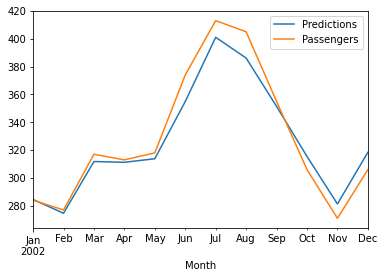

In [14]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [15]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Passengers"], predictions)

10.331675977607135

In [16]:
#Forecast using ARIMA Model
# Train the model on the full dataset
model = model = SARIMAX(Airlines['Passengers'], 
                        order = (1, 1, 0), 
                        seasonal_order =(1, 1, 0, 12))
result = model.fit()

In [17]:
# Forecast for the next 5 years
forecast = result.predict(start = len(Airlines), 
                          end = (len(Airlines)-1) + 5 * 12, 
                          typ = 'levels').rename('Forecast')

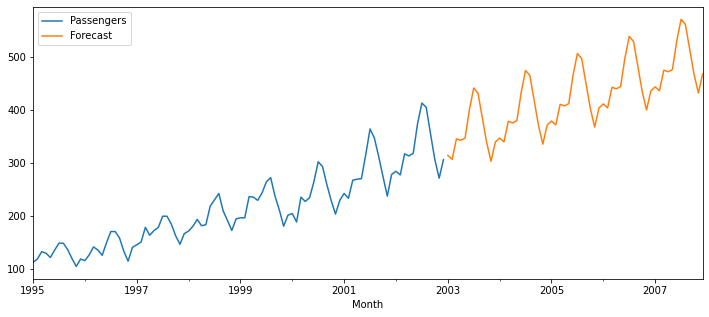

In [18]:
# Plot the forecast values
Airlines['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

# -------------------------------------------------------------------------------------------------------------

# Coco cola & sales forecasting

In [19]:
CocaCola_Sales=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
CocaCola_Sales

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [20]:
import plotly.express as px

figure=px.line(CocaCola_Sales,x='Quarter',
              y='Sales',
              title='Quarter sales')
figure.show()

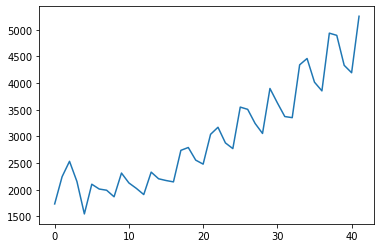

In [21]:
CocaCola_Sales.Sales.plot()

In [22]:
# preprocessing
quarter=['Q1','Q2','Q3','Q4']
n=CocaCola_Sales['Quarter'][0]
n[0:2] # triming the year

'Q1'

In [23]:
CocaCola_Sales['quarter']=0
for i in range(42):
    n=CocaCola_Sales['Quarter'][i]
    CocaCola_Sales['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(CocaCola_Sales['quarter']))
    data1=pd.concat((CocaCola_Sales,dummy),axis=1)
t= np.arange(1,43)
data1['t']=t
data1['t_square']=data1['t']*data1['t']
log_Sales=np.log(data1['Sales'])
data1['log_Sales']=log_Sales

data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['quarter']=le.fit_transform(data1['quarter'])
data1['quarter']=data1['quarter']


In [25]:
CocaCola_Sales=data1
CocaCola_Sales

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,0,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,1,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,2,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,3,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,1,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,2,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,3,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,0,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,1,0,1,0,0,10,100,7.746574


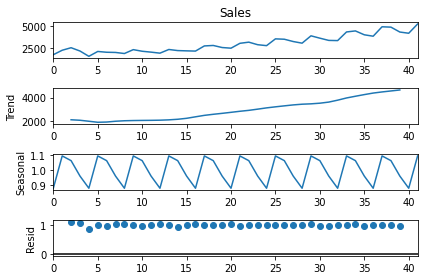

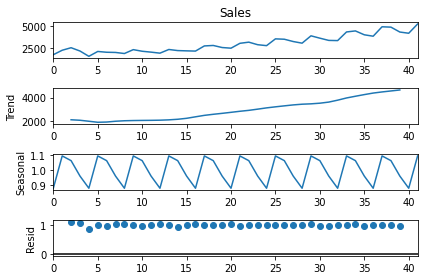

In [26]:
result1 = seasonal_decompose(CocaCola_Sales['Sales'], model ='multiplicative',period= 4)
result1.plot()

In [27]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit1 = auto_arima(CocaCola_Sales['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 3, # one Quarter = 3 momths
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=600.643, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=599.807, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=599.868, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=573.022, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=560.959, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(2,1,2)[3]             : AIC=556.145, Time=1.32 sec
 ARIMA(1,1,0)(1,1,2)[3]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=inf, Time=1.15 sec
 ARIMA(2,1,0)(2,1,2)[3]             : AIC=inf, Time=1.79 sec
 ARIMA(1,1,1)(2,1,2)[3]             : AIC=557.526, Time=1.55 sec
 ARIMA(0,1,1)(2,1,2)[3]             : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(2,1,2)[3]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(

In [28]:
stepwise_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -272.072
Date:                                Sat, 29 Oct 2022   AIC                            556.145
Time:                                        06:11:15   BIC                            565.970
Sample:                                             0   HQIC                           559.641
                                                 - 42                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4561      0.174     -2.620      0.009      -0.797      -0.115
ar.S.L3        0.0231      0.186      0.124      0.901      -0.342       0.388
ar.S.L6       -0.8840      0.073    -12.134      0.000      -1.027      -0.741
ma.S.L3       -1.2514      0.205     -6.095      0.000      -1.654      -0.849
ma.S.L6        0.6592      0.281      2.348      0.019       0.109       1.209
sigma2      6.483e+04   2.39e+04      2.714      0.007     1.8e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.69   Prob(JB):                         0.76
Heteroskedasticity (H):               0.99   Skew:                            -0.09
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Split data into train / test sets
train1= CocaCola_Sales.iloc[:len(CocaCola_Sales)-4]
test1= CocaCola_Sales.iloc[len(CocaCola_Sales)-4:] # set one year(12 months) for testing
  

In [30]:
# Fit a SARIMAX(0, 1, 0)x(0, 1, 0, 12) on the training set
model1 = SARIMAX(train1['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -245.360
Date:                                Sat, 29 Oct 2022   AIC                            502.719
Time:                                        06:11:16   BIC                            511.877
Sample:                                             0   HQIC                           505.842
                                                 - 38                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4225      0.211     -2.004      0.045      -0.836      -0.009
ar.S.L3        0.0352      0.220      0.160      0.873      -0.396       0.466
ar.S.L6       -0.8488      0.095     -8.929      0.000      -1.035      -0.662
ma.S.L3       -1.2617      0.232     -5.435      0.000      -1.717      -0.807
ma.S.L6        0.6243      0.311      2.006      0.045       0.014       1.234
sigma2      7.273e+04   2.94e+04      2.475      0.013    1.51e+04     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.62   Prob(JB):                         0.81
Heteroskedasticity (H):               0.95   Skew:                            -0.06
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Predictions of ARIMA Model against the test set
Start = len(train1)
End = len(train1) + len(test1) - 1

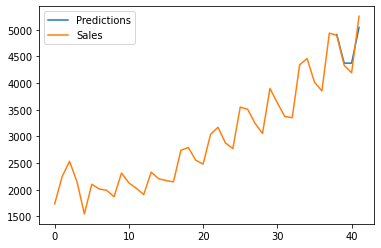

In [33]:
# Predictions for one-year against the test set
predictions = result.predict(Start, End, typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
CocaCola_Sales['Sales'].plot(legend = True)

In [34]:
# Calculate root mean squared error
rmse(test1["Sales"], predictions)

140.05557171059948

In [35]:
#Forecast using SARIMA Model
# Train the model on the full dataset
model = SARIMAX(CocaCola_Sales['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))
result2 = model.fit()

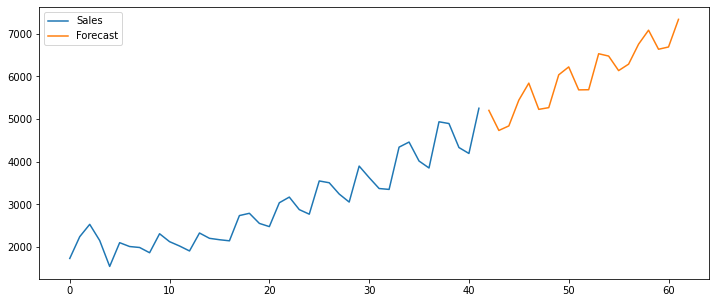

In [36]:
# Forecast for the next 5 years
forecast = result2.predict(start = len(CocaCola_Sales), 
                          end = (len(CocaCola_Sales)-1) + 5 * 4, 
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
CocaCola_Sales['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)